<a href="https://colab.research.google.com/github/firdausdicko97/skripsi/blob/main/Skripsi_LSTM_Fix_rapih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
# Memanggil library yang dibutuhkan
 
import numpy as np # library untuk proses perhitungan numerik penjumlahan, pengurangan, perkalian, dsb
import pandas as pd # membersihkan data mentah ke dalam sebuah bentuk tabel
import seaborn as sns # membuat grafik
import matplotlib.pyplot as plt # visualisasi data
import nltk # NLP
import re #fungsi regex
import Sastrawi #library bahasa
# matplotlibinline untuk langsung cetak visualisasi
%matplotlib inline 

In [ ]:
#Upload dataset dan melihat isinya
df=pd.read_csv('/content/drive/MyDrive/SKRIPSI/dataset_efek_vaksin_0_1.csv')
print('1 = positive \n0 = negative')
df.head()

1 = positive 
0 = negative


,tweet,label
0,@kemenkesri manfaat vaksin dalam penanganan co...,1
1,@bertanyarl vaksin bukan covid aja pegel nderr...,0
2,investasi efek samping vaksin covid-19 tak han...,0
3,manfaat vaksin dalam penanganan covid-19 lebih...,1
4,mama gue sakit abis vaksin covid padahal sebel...,0


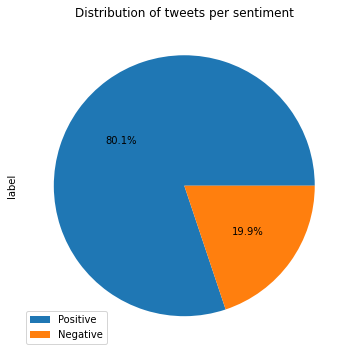

In [ ]:
#Membuat grafik
df['label'].value_counts().plot.pie(figsize=(6,6),title="Distribution of tweets per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

In [ ]:
#import Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover as swr, ArrayDictionary
#import Sastrawi Stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#Import Function Tokenizer
from nltk.tokenize import TweetTokenizer


stop_factory = StopWordRemoverFactory()
stopwords_id = stop_factory.get_stop_words()
more_stopword = ['yang', 'yg', 'untuk', 'pada', 'pd', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia',
                 'dua', 'ia', 'seperti', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada',
                 'kpd', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'belom', 'blm', 'kami', 'sekitar', 'bagi',
                 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'dlm', 'bisa',
                 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'dgn', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap',
                 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'knp', 'yaitu', 'yakni', 'daripada', 'itulah',
                 'lagi', 'lg', 'maka', 'tentang', 'ttg', 'demi', 'dimana', 'dmn', 'kemana', 'kmn', 'pula', 'sambil', 'sebelum',
                 'sblm', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi',
                 'apakah', 'apa', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh',
                 'dapat', 'dpt', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'tp', 'ingin', 'juga',
                 'jg', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya',
                 'sesuatu', 'pasti', 'saja', 'aja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'amat', 'apalagi', 'bagaimanapun',
                 'noh', 'kan', 'kok', 'klo', 'kalo','krn','gua','gue','gw','lw','amp']
 
data_stopword = stopwords_id + more_stopword
dictionary = ArrayDictionary(data_stopword)
stop = swr(dictionary)
 
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#Case Folding
df['hasil_case_folding']= df.apply(lambda row: str.lower(row['tweet']), axis =1)
df = df[["tweet", "hasil_case_folding", "label"]] #Mengurutkan kolom pada tabel
df = df.drop('tweet', axis=1) #Menghapus kolom yang tidak perlu
df = df.rename(columns={'hasil_case_folding': 'tweet'})
 
#Tokenize
def clean(teks):
    teks = re.sub(r"https?\://\S+", "", teks) #Menghapus link https
    teks = re.sub(r"[@][\w_-]+", "", teks) #Menghapus mention
    teks = re.sub(r"[#][\w_-]+", "", teks) #Menghapus hashtag
    teks = re.sub(r"[^\w\s]", " ", teks) #Menghapus tanda baca
    teks = re.sub(r"\d+"," ",teks) #Menghapus angka
    teks = re.sub(r" +", " ",teks) #Menghapus spasi ganda
    teks = re.sub(r"^\s+","",teks) #Menghapus spasi di awal kalimat
    teks = re.sub(r"\s+$","",teks) #Menghapu spasi di akhir kalimat
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(teks)
 
#filtering (remove stop word)
    teks = stop.remove(teks)
    teks = stop.remove(teks)
 
#Stemming
    clean_text = []    
    for word in tweet_tokens:
        stem_word = stemmer.stem(word) 
        clean_text.append(stem_word)
    
    return clean_text

In [ ]:
df=df.head(745)
df['tokenized_text']=df['tweet'].map(clean)
df['clean_text']=df['tokenized_text'].apply(lambda x: " ".join([str(word) for word in x]))

In [ ]:
df.to_csv(r'/content/drive/MyDrive/SKRIPSI/dataset_bersih_rapih.csv', index=False)#Menyimpan hasil stopword

In [ ]:
df.head()

,tweet,label,tokenized_text,clean_text
0,@kemenkesri manfaat vaksin dalam penanganan co...,1,"[manfaat, vaksin, dalam, tangan, covid, lebih,...",manfaat vaksin dalam tangan covid lebih besar ...
1,@bertanyarl vaksin bukan covid aja pegel nderr...,0,"[vaksin, bukan, covid, aja, gel, nderr, sama, ...",vaksin bukan covid aja gel nderr sama aja itu ...
2,investasi efek samping vaksin covid-19 tak han...,0,"[investasi, efek, samping, vaksin, covid, tak,...",investasi efek samping vaksin covid tak hanya ...
3,manfaat vaksin dalam penanganan covid-19 lebih...,1,"[manfaat, vaksin, dalam, tangan, covid, lebih,...",manfaat vaksin dalam tangan covid lebih besar ...
4,mama gue sakit abis vaksin covid padahal sebel...,0,"[mama, gue, sakit, abis, vaksin, covid, padaha...",mama gue sakit abis vaksin covid padahal belum...


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_review_length = 250
 
tokenizer = Tokenizer(num_words=10000, #max no. of unique words to keep
#                      # filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=False #convert to lower case
                     )
tokenizer.fit_on_texts(df['tokenized_text'])
word_index = tokenizer.word_index
print("found %s unique token. " %len(word_index))

found 2353 unique token. 


In [ ]:
#mengubah variabel kategorial menjadi numerik
Y=pd.get_dummies(df['label']).values

#berfungsi untuk mengubah text menjadi urutan integer lalu jadi list array
X = tokenizer.texts_to_sequences(df['tokenized_text'].values)
X = sequence.pad_sequences(X, maxlen= max_review_length)

In [ ]:
print(X.shape)

(745, 250)


In [ ]:
#Membagi data train dan data test
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42, shuffle = True, stratify = Y)
print("Hasil pembagian data:\n- Train: {} \n- Test: {}".format(len(y_train),len(y_test)))

Hasil pembagian data:
- Train: 596 
- Test: 149


In [ ]:
#Merancang model LSTM
EMBEDDING_VEC = 100
model = Sequential()
model.add(Embedding(2500, EMBEDDING_VEC, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2)) #mengubah input unit secara acak menjadi 0
model.add(LSTM(64, dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax')) #mengubah vektor angka menjadi vektor probabilitas
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #fungsi untuk kalkulasi prediksi
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          250000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 292,370
Trainable params: 292,370
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
hist = model.fit(X_train, y_train, 
          epochs=50, 
          batch_size= 250,
          validation_data=(X_test,y_test))

Epoch 1/50
3/3 [==============================] - 8s 1s/step - loss: 0.6878 - accuracy: 0.6359 - val_loss: 0.6652 - val_accuracy: 0.7987
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 0.6557 - accuracy: 0.8020 - val_loss: 0.6233 - val_accuracy: 0.7987
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 0.6071 - accuracy: 0.8020 - val_loss: 0.5481 - val_accuracy: 0.7987
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 0.5214 - accuracy: 0.8020 - val_loss: 0.4839 - val_accuracy: 0.7987
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 0.4858 - accuracy: 0.8020 - val_loss: 0.4911 - val_accuracy: 0.7987
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 0.4753 - accuracy: 0.8020 - val_loss: 0.4720 - val_accuracy: 0.7987
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 0.4563 - accuracy: 0.8020 - val_loss: 0.4694 - val_accuracy: 0.7987
Epoch 8/50
3/3 [=========================

19/19 [==============================] - 1s 48ms/step - loss: 0.0052 - accuracy: 1.0000
Accuracy:  100.0 %


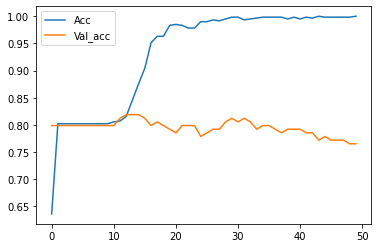

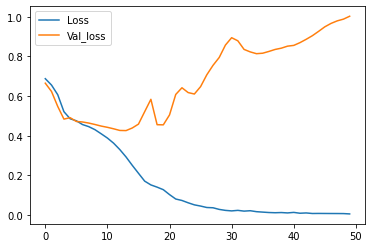

In [ ]:
score = model.evaluate(X_train, y_train)
print("Accuracy: ", score[1]*100, "%")
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acc', 'Val_acc'])
plt.show()
 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])
plt.show()

0.7651006711409396
              precision    recall  f1-score   support

     negatif       0.41      0.40      0.41        30
     positif       0.85      0.86      0.85       119

    accuracy                           0.77       149
   macro avg       0.63      0.63      0.63       149
weighted avg       0.76      0.77      0.76       149



Text(0.5, 1.0, 'Confussion Matrix ds')

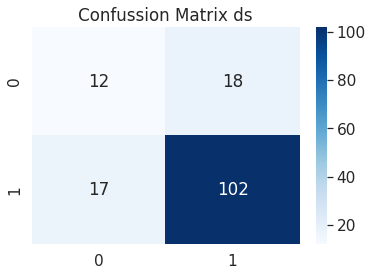

In [ ]:
import seaborn as sn
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix, precision_score, recall_score
 
prediction = model.predict(X_test)
y_pred = (prediction)

print(metrics.accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
target_names = ['negatif', 'positif']
cnf_matrix_test = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))
 
df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm,cmap="Blues", annot=True, fmt='d')
plt.title('Confussion Matrix ds')

In [ ]:
# uji coba prediksi
 
twt = [input("Input sampel tweet: ")]
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, dtype='int32', value=0)
label = model.predict(twt)
if(np.argmax(label) == 0):
    print("negative")
elif (np.argmax(label) == 1):
    print("positive")

Input sampel tweet: jangan takut efek samping suntik vaksin covid bisa sembuh sendiri nusantara satu
positive
